# 1.1 Tabular Model to Predict Trial from OMA Eigenvalues
Imported from matlab script to generate eigenvalue table and plots
ATM (2021-03-15) seems like it's not gonna work. Of course.

In [1]:
#hide
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

OSError: ignored

In [1]:
#hide
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [2]:
df_raw = pd.read_csv('/content/OMA_deap_30order_eigvals_head.csv')
df_raw

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode2,...,Imag_Comp27_Mode27,Imag_Comp28_Mode28,Imag_Comp29_Mode29,Imag_Comp30_Mode30
0,1,1,0.470394,0.470394,...,0.223240,-0.223240,0.223376,-0.223376
1,1,2,0.473471,0.473471,...,0.264409,-0.264409,0.275287,-0.275287
2,1,3,0.470646,0.470646,...,0.271978,-0.271978,0.257485,-0.257485
3,1,4,0.465920,0.465920,...,0.273254,-0.273254,0.277068,-0.277068
4,1,5,0.469351,0.469351,...,0.235752,-0.235752,0.250617,-0.250617
...,...,...,...,...,...,...,...,...,...
1275,32,36,-0.488653,-0.488653,...,0.273430,-0.273430,0.283993,-0.283993
1276,32,37,-0.187319,-0.187319,...,0.306053,-0.306053,0.282858,-0.282858
1277,32,38,-0.506144,-0.506144,...,0.248994,-0.248994,0.278539,-0.278539
1278,32,39,-0.521102,-0.521102,...,0.318746,-0.318746,0.304071,-0.304071


In [4]:
df_raw.iloc[[40],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode2,...,Imag_Comp27_Mode27,Imag_Comp28_Mode28,Imag_Comp29_Mode29,Imag_Comp30_Mode30
40,2,1,-0.492897,-0.492897,...,0.303058,-0.303058,0.286867,-0.286867


Text(0.5, 1.0, 'Imag_Comp29_Mode29')

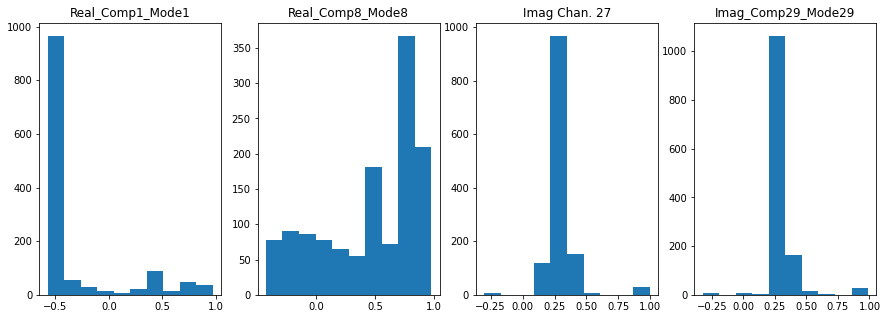

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].hist(df_raw.Real_Comp1_Mode1)
axs[0].set_title('Real_Comp1_Mode1')
axs[1].hist(df_raw.Real_Comp8_Mode8)
axs[1].set_title('Real_Comp8_Mode8')
axs[2].hist(df_raw.Imag_Comp27_Mode27)
axs[2].set_title('Imag Chan. 27')
axs[3].hist(df_raw.Imag_Comp29_Mode29)
axs[3].set_title('Imag_Comp29_Mode29')

In [6]:
cont_names=[];
for col in df_raw.columns: 
    cont_names.append(col) 


In [7]:
cont_names.remove('Trial')
cont_names.remove('Subject')


In [8]:
dls = TabularDataLoaders.from_csv('/content/OMA_deap_30order_eigvals_head.csv', y_names="Trial",
    cat_names = ['Subject'], y_block=CategoryBlock,
    cont_names = cont_names,
    procs = [Categorify, FillMissing, Normalize])

In [9]:
learn = tabular_learner(dls, metrics=accuracy, y_range=[1,40])

In [10]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,5.387477,4.146384,0.027344,00:00
1,4.893050,4.202901,0.023438,00:00
2,4.485641,4.287354,0.011719,00:00
3,4.136891,4.377326,0.007812,00:00
4,3.853032,4.459110,0.011719,00:00
5,3.617933,4.592286,0.007812,00:00
6,3.403245,4.725109,0.003906,00:00
7,3.226661,4.770107,0.007812,00:00
8,3.094016,4.752311,0.003906,00:00
9,2.986717,4.737367,0.003906,00:00


In [11]:
learn.show_results()

,Subject,Real_Comp1_Mode1,Real_Comp2_Mode2,Real_Comp3_Mode3,Real_Comp4_Mode4,Real_Comp5_Mode5,Real_Comp6_Mode6,Real_Comp7_Mode7,Real_Comp8_Mode8,Real_Comp9_Mode9,Real_Comp10_Mode10,Real_Comp11_Mode11,Real_Comp12_Mode12,Real_Comp13_Mode13,Real_Comp14_Mode14,Real_Comp15_Mode15,Real_Comp16_Mode16,Real_Comp17_Mode17,Real_Comp18_Mode18,Real_Comp19_Mode19,Real_Comp20_Mode20,Real_Comp21_Mode21,Real_Comp22_Mode22,Real_Comp23_Mode23,Real_Comp24_Mode24,Real_Comp25_Mode25,Real_Comp26_Mode26,Real_Comp27_Mode27,Real_Comp28_Mode28,Real_Comp29_Mode29,Real_Comp30_Mode30,Imag_Comp1_Mode1,Imag_Comp2_Mode2,Imag_Comp3_Mode3,Imag_Comp4_Mode4,Imag_Comp5_Mode5,Imag_Comp6_Mode6,Imag_Comp7_Mode7,Imag_Comp8_Mode8,Imag_Comp9_Mode9,Imag_Comp10_Mode10,Imag_Comp11_Mode11,Imag_Comp12_Mode12,Imag_Comp13_Mode13,Imag_Comp14_Mode14,Imag_Comp15_Mode15,Imag_Comp16_Mode16,Imag_Comp17_Mode17,Imag_Comp18_Mode18,Imag_Comp19_Mode19,Imag_Comp20_Mode20,Imag_Comp21_Mode21,Imag_Comp22_Mode22,Imag_Comp23_Mode23,Imag_Comp24_Mode24,Imag_Comp25_Mode25,Imag_Comp26_Mode26,Imag_Comp27_Mode27,Imag_Comp28_Mode28,Imag_Comp29_Mode29,Imag_Comp30_Mode30,Trial,Trial_pred
0,10.0,-0.204645,-0.211789,0.834149,0.817669,1.243928,1.209673,0.947457,0.909694,0.670872,0.644751,0.622064,0.599283,0.296157,0.264478,0.359997,0.342403,0.292708,0.274827,0.470649,0.459622,0.345637,0.341218,0.167181,0.165266,0.188212,0.189518,0.102227,0.102897,0.088727,0.091404,0.583729,-0.499029,-0.754515,0.690489,-0.442300,0.358134,-0.336125,0.268317,-0.192354,0.172625,-0.069045,0.068261,-0.175762,0.200891,0.091484,-0.058927,0.201694,-0.189814,-0.547227,0.653215,-0.466611,0.539064,-0.270509,0.280455,-0.153969,0.157096,0.116440,-0.116922,0.314028,-0.316553,12.0,28.0
1,32.0,-0.264877,-0.271310,0.125589,0.116559,0.545786,0.519269,0.705740,0.668563,0.757485,0.731685,0.554641,0.530995,0.554433,0.523901,0.442469,0.426202,0.397114,0.381033,0.232516,0.218581,0.366942,0.362584,0.285389,0.283465,0.202376,0.203673,0.300174,0.300860,0.224110,0.225795,0.334541,-0.295535,0.091766,-0.099089,-0.865356,0.731846,-0.500075,0.416437,-0.254123,0.232531,-0.189527,0.189211,-0.083332,0.104459,-0.122710,0.177345,-0.107255,0.145385,0.027454,0.008035,-0.513841,0.590920,-0.517574,0.532340,-0.428806,0.433876,-0.391020,0.387843,-0.221304,0.240709,10.0,3.0
2,21.0,-0.480694,-0.484577,-0.436938,-0.440054,0.199289,0.176612,-0.552522,-0.586644,-0.183951,-0.213240,0.397461,0.371795,0.368675,0.337318,0.105792,0.084112,0.274753,0.256563,0.239090,0.225235,-0.278126,-0.284311,0.176461,0.174545,0.205513,0.206808,0.335094,0.335783,0.366877,0.367517,0.247037,-0.224077,0.326923,-0.318489,0.964996,-0.885022,0.412658,-0.408170,0.098950,-0.109893,0.262900,-0.264975,0.238444,-0.231245,0.279905,-0.266769,0.232063,-0.222763,0.133870,-0.111435,0.114429,-0.098887,-0.111521,0.118365,-0.211472,0.215005,-0.733541,0.728546,-0.695741,0.734581,24.0,33.0
3,24.0,2.804394,2.761692,2.225946,2.309179,1.325431,1.290274,1.296249,1.257640,1.069666,1.045023,0.887715,0.868348,0.732862,0.703122,0.590451,0.576562,0.364136,0.347486,-0.081690,-0.099462,-0.013266,-0.018701,-0.337127,-0.339004,-0.169596,-0.168076,-0.212259,-0.211614,-0.138255,-0.133916,-2.202259,1.776079,-3.993898,3.712826,-0.912294,0.773309,-1.319196,1.156472,-0.947275,0.904777,-0.661232,0.662750,-0.531275,0.571792,-0.259618,0.328366,-0.153956,0.196053,0.852063,-0.917732,0.588755,-0.619670,1.037336,-1.052908,0.844720,-0.848649,1.062330,-1.057788,1.077693,-1.111501,13.0,12.0
4,24.0,2.700962,2.659482,1.953586,1.925338,1.385569,1.349744,1.297549,1.258937,1.069260,1.044615,0.868861,0.849251,0.721403,0.691613,0.595541,0.581734,0.399628,0.383591,0.205396,0.191130,-0.337311,-0.343664,-0.270743,-0.272625,-0.264379,-0.262802,-0.176923,-0.176276,-0.170871,-0.166293,-1.640919,1.317675,-1.752217,1.621343,-0.703176,0.588581,-1.324985,1.161702,-0.925448,0.883608,-0.675830,0.677405,-0.432674,0.468922,-0.298892,0.371687,-0.003888,0.033235,0.341342,-0.344359,1.198333,-1.288953,1.329525,-1.350797,1.017233,-1.022381,0.985875,-0.981739,1.180